In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

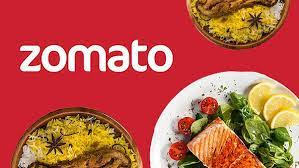

# Introduction

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\zomato\zomato_restaurants_in_India.csv")
print ('data loaded')

data loaded


In [4]:
df.head(3)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1


In [5]:
print(f"Numbers of columns: {df.shape[1]} \nNumber of Rows: {df.shape[0]}")

Numbers of columns: 26 
Number of Rows: 211944


In [6]:
# To check redunant data
df['res_id'].nunique()

55568

In [7]:
df.drop_duplicates('res_id', keep='first',inplace=True)

In [8]:
print(f"Numbers of columns: {df.shape[1]} \nNumber of Rows: {df.shape[0]}")

Numbers of columns: 26 
Number of Rows: 55568


In [9]:
# now set the res_id as index
# why?
df.set_index('res_id',inplace=True)

In [10]:
df.sample()

,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
res_id,,,,,,,,,,,,,,,,,,,,,
18699863,Supriya Brownie & Shake,['Beverage Shop'],https://www.zomato.com/bhubaneswar/supriya-bro...,"62, Unit- 9, Kharabela Nagar, Bhubaneshwar",Bhubaneshwar,29,Kharabela Nagar,20.27752,85.83567,NaN,...,1,Rs.,"['No Seating Available', 'Cash', 'Takeaway Ava...",3.7,Good,36,13,0.0,-1,-1


In [11]:
# use to check datatype and nonnull values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55568 entries, 3400299 to 3201138
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  55568 non-null  object 
 1   establishment         55568 non-null  object 
 2   url                   55568 non-null  object 
 3   address               55550 non-null  object 
 4   city                  55568 non-null  object 
 5   city_id               55568 non-null  int64  
 6   locality              55568 non-null  object 
 7   latitude              55568 non-null  float64
 8   longitude             55568 non-null  float64
 9   zipcode               10945 non-null  object 
 10  country_id            55568 non-null  int64  
 11  locality_verbose      55568 non-null  object 
 12  cuisines              55098 non-null  object 
 13  timings               54565 non-null  object 
 14  average_cost_for_two  55568 non-null  int64  
 15  price_range     

In [12]:
# timings,currency

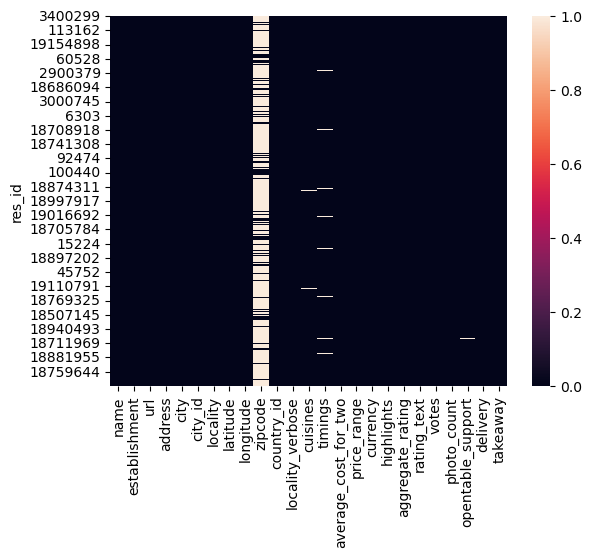

In [13]:
# to check null value
sns.heatmap(df.isna())
plt.show()

In [14]:
((df.isnull().sum()/len(df))*100).round(2)

name                     0.00
establishment            0.00
url                      0.00
address                  0.03
city                     0.00
city_id                  0.00
locality                 0.00
latitude                 0.00
longitude                0.00
zipcode                 80.30
country_id               0.00
locality_verbose         0.00
cuisines                 0.85
timings                  1.80
average_cost_for_two     0.00
price_range              0.00
currency                 0.00
highlights               0.00
aggregate_rating         0.00
rating_text              0.00
votes                    0.00
photo_count              0.00
opentable_support        0.02
delivery                 0.00
takeaway                 0.00
dtype: float64

In [15]:
# zipcofe:- to do

## statical analysis

In [16]:
df.describe().round(2)

,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,55568.00,55568.00,55568.00,55568.0,55568.00,55568.00,55568.00,55568.00,55568.00,55556.0,55568.00,55568.0
mean,3409.50,21.45,76.50,1.0,528.21,1.71,2.96,223.33,160.97,0.0,-0.35,-1.0
std,5174.94,42.90,10.98,0.0,595.03,0.88,1.46,618.22,586.98,0.0,0.93,0.0
min,1.00,0.00,0.00,1.0,0.00,1.00,0.00,-18.00,0.00,0.0,-1.00,-1.0
25%,8.00,16.52,74.65,1.0,200.00,1.00,2.90,6.00,1.00,0.0,-1.00,-1.0
50%,26.00,22.47,77.11,1.0,350.00,1.00,3.50,35.00,10.00,0.0,-1.00,-1.0
75%,11294.00,26.75,79.83,1.0,600.00,2.00,3.90,175.00,69.00,0.0,1.00,-1.0
max,11354.00,10000.00,91.83,1.0,30000.00,4.00,4.90,42539.00,17702.00,0.0,1.00,-1.0


In [17]:
df['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [18]:
df['establishment'].nunique()

27

In [19]:
df['establishment'] = df['establishment'].apply(lambda x: x[2:-2])

In [20]:
df['establishment'] = df['establishment'].apply(lambda x: np.where(x=="","NA",x))

In [21]:
df['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', 'NA', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

In [22]:
df['establishment'].nunique()

27

In [23]:
df.columns

Index(['name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

# TODO
1 >> zip code
2 >> timing
3 >> currency
4 >> NA

In [25]:
df['zipcode'].fillna('others',inplace=True)

In [27]:
df['zipcode'].isna().sum()

0

In [28]:
df['timings'].nunique()

7740

In [30]:
df['timings']

res_id
3400299                            8:30am – 10:30pm (Mon-Sun)
3400005     12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...
3401013                                      9:30 AM to 11 PM
3400290                                  8am – 11pm (Mon-Sun)
3401744                                  11:30 AM to 11:30 PM
                                  ...                        
19142822                                 11 AM to 12 Midnight
18984164                11:30 AM to 3:30 PM, 7:30 PM to 11 PM
18019952                   11 AM to 3:30 PM, 7 PM to 10:30 PM
3200996     4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...
3201138                                          8 AM to 1 AM
Name: timings, Length: 55568, dtype: object

In [31]:
df['currency'].unique()

array(['Rs.'], dtype=object)

In [32]:
df[df['establishment'] == 'NA'].shape

(1830, 25)

In [33]:
df['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', 'NA', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

In [34]:
df['establishment'].replace('NA','other establishment',inplace=True)

In [35]:
df['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', 'other establishment', 'Shack',
       'Club', 'Food Court', 'Mess', 'Butcher Shop', 'Microbrewery',
       'Cocktail Bar', 'Pop up', 'Irani Cafe'], dtype=object)

# Top Data Analysis

In [39]:
top_20_cities = df['city'].value_counts().head(20).reset_index()
top_20_cities.head(5)

,city,count
0,Bangalore,2247
1,Mumbai,2022
2,Pune,1843
3,Chennai,1827
4,New Delhi,1704


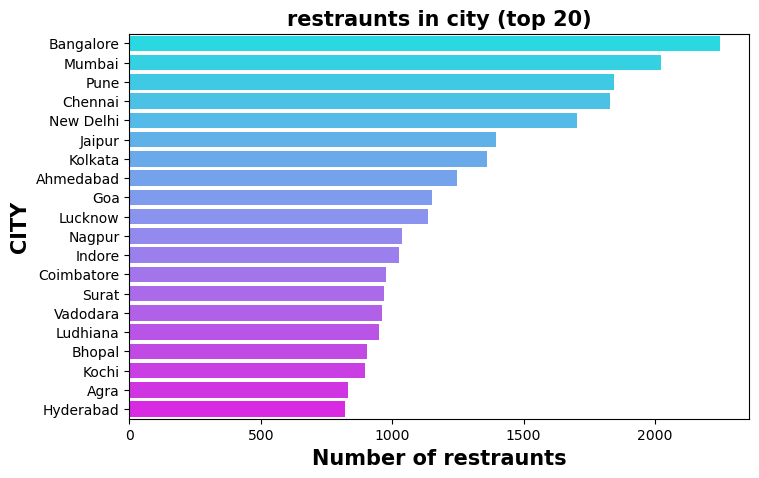

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(y='city',x='count',data=top_20_cities,palette='cool')

plt.title('restraunts in city (top 20)', fontsize=15,fontweight='bold')
plt.ylabel('CITY',fontsize=15,fontweight='bold')
plt.xlabel('Number of restraunts',fontsize=15,fontweight='bold')
plt.show()

In [45]:
bottom_20_cities = df['city'].value_counts().tail(10).reset_index()

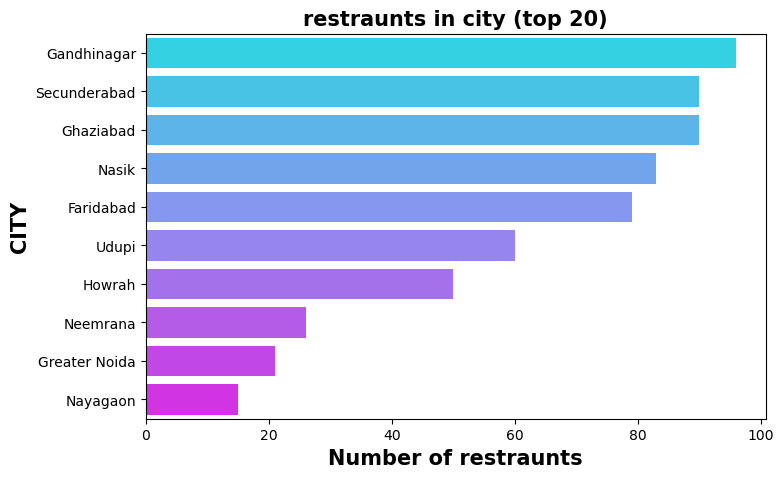

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(y='city',x='count',data=bottom_20_cities,palette='cool')

plt.title('restraunts in city (top 20)', fontsize=15,fontweight='bold')
plt.ylabel('CITY',fontsize=15,fontweight='bold')
plt.xlabel('Number of restraunts',fontsize=15,fontweight='bold')
plt.show()

In [53]:
top_20_name = df['name'].value_counts().head(25).reset_index()
top_20_name.head()

,name,count
0,Domino's Pizza,399
1,Cafe Coffee Day,315
2,KFC,204
3,Baskin Robbins,202
4,Keventers,189


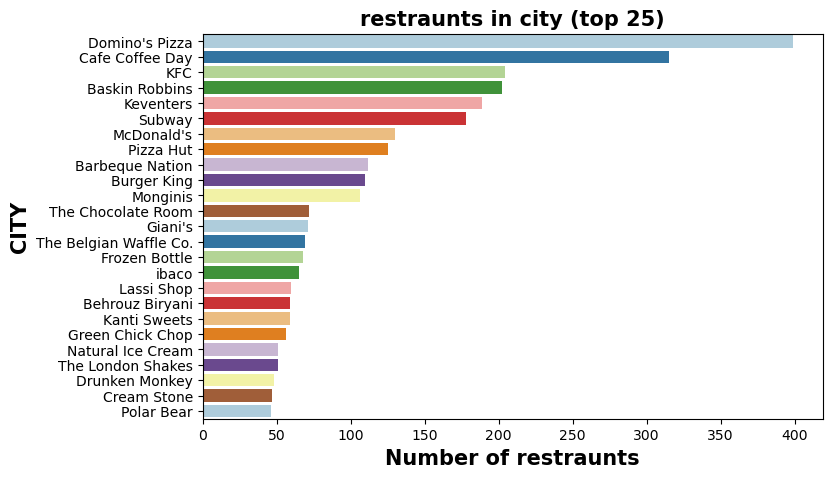

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(y='name',x='count',data=top_20_name,palette='Paired')

plt.title('restraunts in city (top 25)', fontsize=15,fontweight='bold')
plt.ylabel('CITY',fontsize=15,fontweight='bold')
plt.xlabel('Number of restraunts',fontsize=15,fontweight='bold')
plt.show()

# TODO Bottom:- Name

In [61]:
top_7_establishment=df['establishment'].value_counts().head(7).reset_index()
top_7_establishment

,establishment,count
0,Quick Bites,14032
1,Casual Dining,12270
2,Café,4123
3,Bakery,3741
4,Dessert Parlour,3675
5,Sweet Shop,2615
6,Beverage Shop,2440


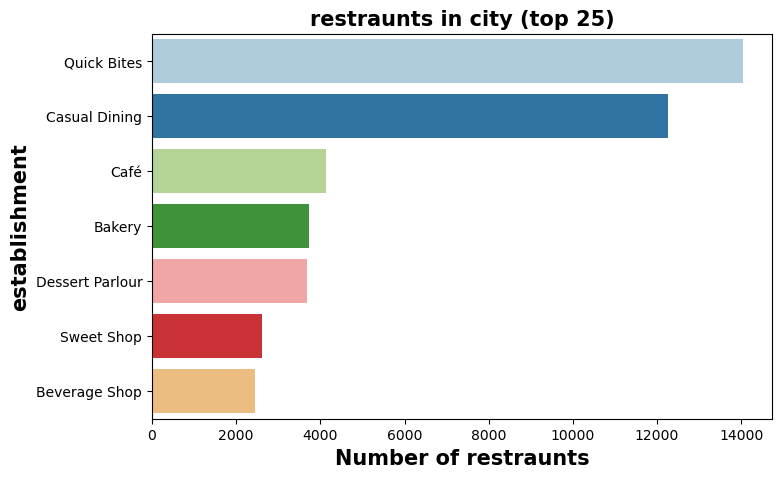

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(y='establishment',x='count',data=top_7_establishment,palette='Paired')

plt.title('restraunts in city (top 25)', fontsize=15,fontweight='bold')
plt.ylabel('establishment',fontsize=15,fontweight='bold')
plt.xlabel('Number of restraunts',fontsize=15,fontweight='bold')
plt.show()

In [66]:
by_cuisines = df['cuisines'].value_counts().head(10).reset_index()
by_cuisines

,cuisines,count
0,North Indian,4295
1,Fast Food,2025
2,"North Indian, Chinese",1636
3,Bakery,1585
4,South Indian,1489
5,Street Food,1187
6,Cafe,1098
7,Mithai,1020
8,Desserts,922
9,"Bakery, Desserts",836


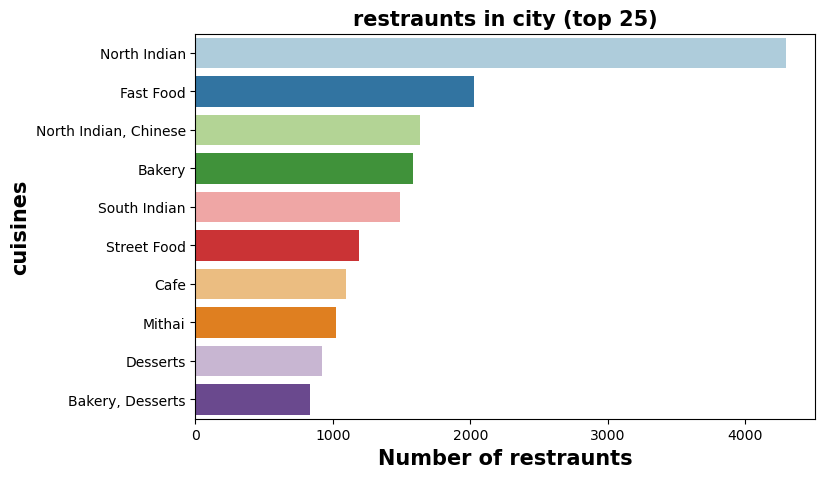

In [69]:
plt.figure(figsize=(8,5))
sns.barplot(y='cuisines',x='count',data=by_cuisines,palette='Paired')

plt.title('restraunts in city (top 25)', fontsize=15,fontweight='bold')
plt.ylabel('cuisines',fontsize=15,fontweight='bold')
plt.xlabel('Number of restraunts',fontsize=15,fontweight='bold')
plt.show()

In [72]:
df['price_range'].unique()

array([2, 1, 3, 4], dtype=int64)

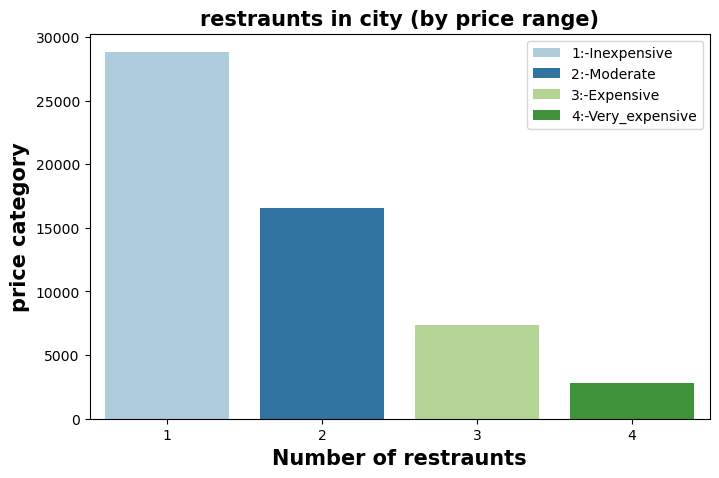

In [85]:
plt.figure(figsize=(8,5))
sns.countplot(x='price_range',data=df,palette='Paired')

plt.title('restraunts in city (by price range)', fontsize=15,fontweight='bold')
plt.ylabel('price category',fontsize=15,fontweight='bold')
plt.xlabel('Number of restraunts',fontsize=15,fontweight='bold')
plt.legend(['1:-Inexpensive','2:-Moderate','3:-Expensive','4:-Very_expensive'])
plt.show()

In [87]:
# lets found price range values

p1max=df[df['price_range']==1]['average_cost_for_two'].max()
p2max=df[df['price_range']==2]['average_cost_for_two'].max()
p3max=df[df['price_range']==3]['average_cost_for_two'].max()
p4max=df[df['price_range']==4]['average_cost_for_two'].max()

p1min=df[df['price_range']==1]['average_cost_for_two'].min()
p2min=df[df['price_range']==2]['average_cost_for_two'].min()
p3min=df[df['price_range']==3]['average_cost_for_two'].min()
p4min=df[df['price_range']==4]['average_cost_for_two'].min()

print(p1max,p2max,p3max,p4max)
print(p1min,p2min,p3min,p4min)

450 999 1900 30000
0 250 500 1000


In [88]:
prices=pd.DataFrame({'price category':[1,2,3,4],
                    'price range':['50-450','250-999','999-1900','1900-3000']})

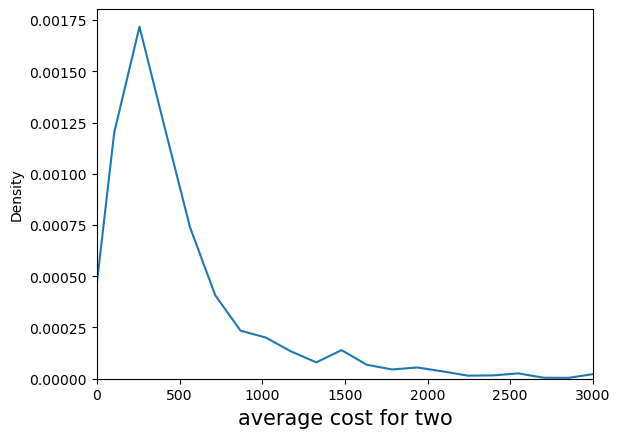

In [89]:
sns.kdeplot(df["average_cost_for_two"])
plt.xlim(0,3000)
plt.xlabel('average cost for two',fontsize=15)
plt.show()

In [92]:
luxury = df.groupby(['name','establishment','city'])['average_cost_for_two'].max().sort_values(ascending=False).head(10).reset_index()
luxury

,name,establishment,city,average_cost_for_two
0,Ocean - The Private Dining Room - Sahara Star,Fine Dining,Mumbai,30000
1,Gol Bungalow - Taj Falaknuma Palace,Fine Dining,Hyderabad,15000
2,Bhairo,Fine Dining,Udaipur,15000
3,Fly Dining,Fine Dining,Bangalore,14000
4,Trophy Bar- Umaid Bhawan Palace,Bar,Jodhpur,12000
5,Pillars - Umaid Bhawan Palace,Fine Dining,Jodhpur,12000
6,Risala- Umaid Bhawan Palace,Fine Dining,Jodhpur,12000
7,Wasabi By Morimoto - The Taj Mahal Palace,Fine Dining,Mumbai,10000
8,Whiskys - Deltin Royale,Bar,Goa,8000
9,Adaa - Taj Falaknuma Palace,Fine Dining,Hyderabad,8000


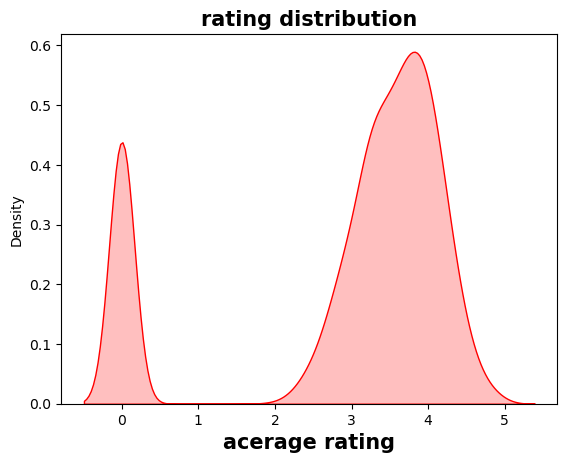

In [94]:
sns.kdeplot(df['aggregate_rating'],shade=True,color='r')

plt.title('rating distribution',fontsize=15,fontweight='bold')
plt.xlabel('acerage rating',fontsize=15,fontweight='bold')
plt.show()

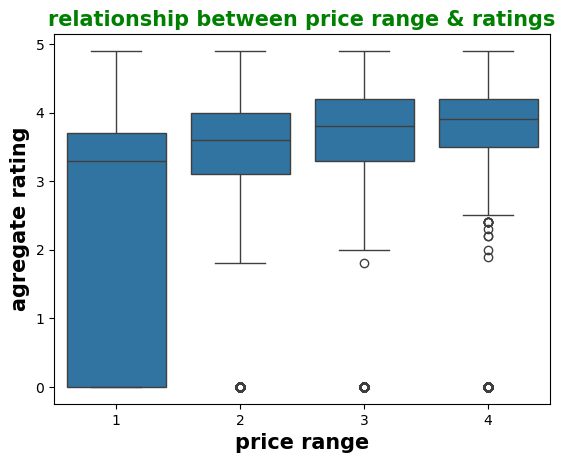

In [95]:
sns.boxplot(x='price_range',y='aggregate_rating',data=df)

plt.title('relationship between price range & ratings',fontsize=15,fontweight='bold',color='g')
plt.xlabel('price range',fontsize=15,fontweight='bold')
plt.ylabel('agregate rating',fontsize=15,fontweight='bold')
plt.show()

In [103]:
def check(input_list):
    if 'delivery' in input_list:
        return 'delivery available'

    elif 'takeaway available' in input_list:
        return 'takeaway available'

    else:
        return 'no delivery available'

In [105]:
df['highlights']

res_id
3400299     ['Lunch', 'Takeaway Available', 'Credit Card',...
3400005     ['Delivery', 'No Alcohol Available', 'Dinner',...
3401013     ['No Alcohol Available', 'Dinner', 'Takeaway A...
3400290     ['Takeaway Available', 'Credit Card', 'Lunch',...
3401744     ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
                                  ...                        
19142822    ['Cash', 'Takeaway Available', 'Delivery', 'In...
18984164    ['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...
18019952    ['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...
3200996     ['Dinner', 'Cash', 'Takeaway Available', 'Debi...
3201138     ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...
Name: highlights, Length: 55568, dtype: object

In [106]:
ff=df['highlights'].apply(check).value_counts().reset_index()
ff

,highlights,count
0,no dilivery available,55568


([<matplotlib.patches.Wedge at 0x20423573ec0>],
 [Text(-1.1, 1.3471114790620887e-16, 'no dilivery available')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

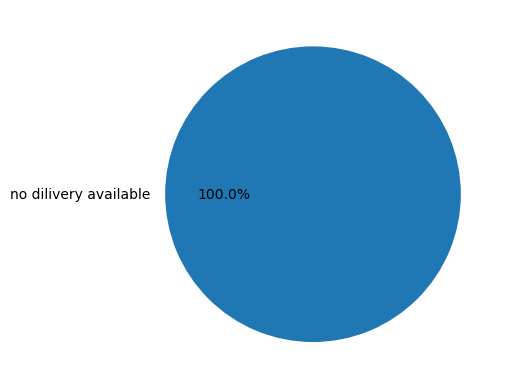

In [107]:
plt.pie(ff['count'],
       labels= ff['highlights'],
       autopct='%.1f%%')

In [120]:
from wordcloud import WordCloud
print('done')

done


In [118]:
# data

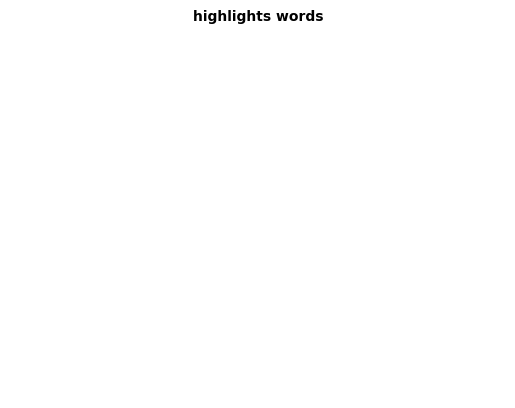

In [121]:
data = ' '.join(df['highlights'])
wc= WordCloud(width=800,height=400).generate(data)
plt.title('highlights words',fontsize=10,fontweight='bold')
plt.axis('off')
plt.show()